In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import MoS2_data_cleaning as mo
import find_SS as fs
import os
import re
import numpy as np
from scipy.ndimage import gaussian_filter1d



Run the first cell to initial the notebook. Edit the directory path in the next cell. The third last cell is for sorting and saving `csv` files for origin. The second last and last cell are for SS calculation. 

In [2]:
directory_path ="C:\\Users\\sophi\\Box\\MoS2Project\\Previous\\2025-11-18-10mVExamples"  # Replace with your directory path
if not os.path.isdir(f'{directory_path}\sorted'):
    os.mkdir(f'{directory_path}\sorted')
file_list = []
for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    if os.path.isfile(file_path):
        file_list.append(file_path)

In [7]:
filename = file_list[0]

df  = pd.read_csv(filename, skiprows=256)
df.drop(df.columns[0], axis=1, inplace=True)

Vbg = df.iloc[1, 2]
df.drop(columns=[' Vbg', ' IS'], inplace=True)




df.head()


,VTG,VD,ID,ITG,Ibg
0,-1.50,0.1,2.656300e-10,-5.925200e-10,-4.640000e-12
1,-1.49,0.1,3.296700e-10,-5.653200e-10,2.160000e-11
2,-1.48,0.1,3.880600e-10,-5.758000e-10,-1.990000e-11
3,-1.47,0.1,3.318200e-10,-5.525700e-10,1.817000e-11
4,-1.46,0.1,3.177400e-10,-5.528500e-10,-3.980000e-12


In [8]:
df[' forward'] = True

df.loc[(df.index >= 301) & (df.index <= 601), ' forward'] = False
df.loc[(df.index >= 903) & (df.index <= 1203), ' forward'] = False
df.loc[(df.index >= 1505) & (df.index <= 1805), ' forward'] = False
df.loc[(df.index >= 2107) & (df.index <= 2407), ' forward'] = False

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

       VTG   VD            ID           ITG           Ibg  forward
0    -1.50  0.1  2.656300e-10 -5.925200e-10 -4.640000e-12     True
1    -1.49  0.1  3.296700e-10 -5.653200e-10  2.160000e-11     True
2    -1.48  0.1  3.880600e-10 -5.758000e-10 -1.990000e-11     True
3    -1.47  0.1  3.318200e-10 -5.525700e-10  1.817000e-11     True
4    -1.46  0.1  3.177400e-10 -5.528500e-10 -3.980000e-12     True
5    -1.45  0.1  2.931600e-10 -5.311600e-10  5.020000e-12     True
6    -1.44  0.1  3.288900e-10 -5.157900e-10  1.495000e-11     True
7    -1.43  0.1  3.206800e-10 -5.319100e-10 -1.881000e-11     True
8    -1.42  0.1  3.066400e-10 -5.203000e-10  1.117000e-11     True
9    -1.41  0.1  2.579500e-10 -4.988900e-10 -8.310000e-12     True
10   -1.40  0.1  3.002300e-10 -4.712200e-10  8.300000e-13     True
11   -1.39  0.1  2.307600e-10 -4.875900e-10  1.433000e-11     True
12   -1.38  0.1  2.414200e-10 -4.671600e-10 -2.234000e-11     True
13   -1.37  0.1  2.694400e-10 -4.586500e-10  1.054000e-11     

In [9]:
df_new = pd.pivot_table(df,columns=' VD',values=[' ID',' ITG',' Ibg'],index=[' VTG',' forward'])
df_new.columns

# df_sorted.to_csv('IdVd_sorted.csv', index=True)

MultiIndex([( ' ID', 0.1),
            ( ' ID', 0.4),
            ( ' ID', 0.7),
            ( ' ID', 1.0),
            (' ITG', 0.1),
            (' ITG', 0.4),
            (' ITG', 0.7),
            (' ITG', 1.0),
            (' Ibg', 0.1),
            (' Ibg', 0.4),
            (' Ibg', 0.7),
            (' Ibg', 1.0)],
           names=[None, ' VD'])

In [10]:
df_sorted = df_new.sort_values(by=[' forward',' VTG'])
df_sorted

ID                                            \
 VD                      0.1           0.4           0.7           1.0   
 VTG   forward                                                           
-1.50 False     3.375900e-10  3.087800e-10  3.279300e-10  3.821100e-10   
-1.49 False     3.443900e-10  3.088700e-10  3.195800e-10  3.407100e-10   
-1.48 False     3.513600e-10  3.132600e-10  3.193800e-10  3.439100e-10   
-1.47 False     3.267600e-10  3.173500e-10  3.226800e-10  3.478500e-10   
-1.46 False     3.387400e-10  3.142800e-10  3.091400e-10  3.443000e-10   
...                      ...           ...           ...           ...   
 1.46 True      6.128580e-08  2.052200e-07  2.934200e-07  3.625000e-07   
 1.47 True      6.172860e-08  2.046600e-07  2.956800e-07  3.594600e-07   
 1.48 True      6.163720e-08  2.047400e-07  2.970000e-07  3.592400e-07   
 1.49 True      6.062340e-08  2.082400e-07  2.929800e-07  3.578200e-07   
 1.50 True      6.035840e-08  2.067800e-07  2.898000e-07  3.603400e-07   

                         ITG                                            \
 VD                      0.1           0.4           0.7           1.0   
 VTG   forward                                                           
-1.50 False    -6.244700e-10 -5.527000e-10 -5.716000e-10 -6.156700e-10   
-1.49 False    -6.131400e-10 -5.452300e-10 -5.729200e-10 -6.117500e-10   
-1.48 False    -5.852300e-10 -5.345600e-10 -5.654700e-10 -5.888300e-10   
-1.47 False    -5.889000e-10 -5.444500e-10 -5.804000e-10 -5.857500e-10   
-1.46 False    -5.929500e-10 -5.240600e-10 -5.501400e-10 -5.771900e-10   
...                      ...           ...           ...           ...   
 1.46 True      1.041380e-08  7.413700e-09  5.081300e-09  4.378000e-09   
 1.47 True      1.122790e-08  7.003500e-09  5.155900e-09  4.678300e-09   
 1.48 True      1.135360e-08  7.485200e-09  5.342400e-09  4.477000e-09   
 1.49 True      1.142180e-08  7.282400e-09  5.304700e-09  4.755100e-09   
 1.50 True      1.163180e-08  7.649700e-09  5.805100e-09  4.878400e-09   

                         Ibg                                            
 VD                      0.1           0.4           0.7           1.0  
 VTG   forward                                                          
-1.50 False     2.481000e-11 -9.150000e-12  1.576000e-11  2.720000e-12  
-1.49 False    -7.660000e-12  2.059000e-11 -3.910000e-12 -1.026000e-11  
-1.48 False    -1.800000e-13 -1.763000e-11 -7.360000e-12  1.697000e-11  
-1.47 False     1.430000e-12  5.660000e-12  1.430000e-11 -1.891000e-11  
-1.46 False    -2.042000e-11  3.610000e-12 -1.990000e-11  2.940000e-12  
...                      ...           ...           ...           ...  
 1.46 True     -9.380000e-12 -3.270000e-12  9.980000e-12 -3.900000e-12  
 1.47 True      1.522000e-11  2.202000e-11  8.530000e-12 -1.952000e-11  
 1.48 True     -6.020000e-12  7.800000e-13 -1.383000e-11  4.710000e-12  
 1.49 True      2.095000e-11 -2.285000e-11  1.730000e-12  1.817000e-11  
 1.50 True     -2.017000e-11  5.960000e-12  2.314000e-11 -1.790000e-12  

[602 rows x 12 columns]

In [11]:
midpoint = len(df_sorted) // 2

# Split the DataFrame into two halves
first_half = df_sorted.iloc[:midpoint]
second_half = df_sorted.iloc[midpoint:]

# Sort the first half in ascending order based on 'col1'
first_half_sorted = first_half.sort_values(by=' VTG', ascending=True)

# Sort the second half in descending order based on 'col1'
second_half_sorted = second_half.sort_values(by=' VTG', ascending=False)

# Concatenate the sorted halves back together
sorted_df = pd.concat([first_half_sorted, second_half_sorted])

print("\nSorted DataFrame (first half ascending, second half descending):")
sorted_df.head()


Sorted DataFrame (first half ascending, second half descending):


ID                                            \
 VD                      0.1           0.4           0.7           1.0   
 VTG   forward                                                           
-1.50 False     3.375900e-10  3.087800e-10  3.279300e-10  3.821100e-10   
-1.49 False     3.443900e-10  3.088700e-10  3.195800e-10  3.407100e-10   
-1.48 False     3.513600e-10  3.132600e-10  3.193800e-10  3.439100e-10   
-1.47 False     3.267600e-10  3.173500e-10  3.226800e-10  3.478500e-10   
-1.46 False     3.387400e-10  3.142800e-10  3.091400e-10  3.443000e-10   

                         ITG                                            \
 VD                      0.1           0.4           0.7           1.0   
 VTG   forward                                                           
-1.50 False    -6.244700e-10 -5.527000e-10 -5.716000e-10 -6.156700e-10   
-1.49 False    -6.131400e-10 -5.452300e-10 -5.729200e-10 -6.117500e-10   
-1.48 False    -5.852300e-10 -5.345600e-10 -5.654700e-10 -5.888300e-10   
-1.47 False    -5.889000e-10 -5.444500e-10 -5.804000e-10 -5.857500e-10   
-1.46 False    -5.929500e-10 -5.240600e-10 -5.501400e-10 -5.771900e-10   

                         Ibg                                            
 VD                      0.1           0.4           0.7           1.0  
 VTG   forward                                                          
-1.50 False     2.481000e-11 -9.150000e-12  1.576000e-11  2.720000e-12  
-1.49 False    -7.660000e-12  2.059000e-11 -3.910000e-12 -1.026000e-11  
-1.48 False    -1.800000e-13 -1.763000e-11 -7.360000e-12  1.697000e-11  
-1.47 False     1.430000e-12  5.660000e-12  1.430000e-11 -1.891000e-11  
-1.46 False    -2.042000e-11  3.610000e-12 -1.990000e-11  2.940000e-12

In [12]:
column_names_list = sorted_df.columns.tolist()
column_names_list

[(' ID', 0.1),
 (' ID', 0.4),
 (' ID', 0.7),
 (' ID', 1.0),
 (' ITG', 0.1),
 (' ITG', 0.4),
 (' ITG', 0.7),
 (' ITG', 1.0),
 (' Ibg', 0.1),
 (' Ibg', 0.4),
 (' Ibg', 0.7),
 (' Ibg', 1.0)]

In [13]:
new_list = []
for tup in column_names_list[0:4]:
    new_list.append(f'Id, V_D = {tup[1]}')
for tup in column_names_list[4:8]:
    new_list.append(f'Itg, V_D = {tup[1]}')
for tup in column_names_list[8:]:
    new_list.append(f'Ibg, V_D = {tup[1]}')



sorted_df.columns = new_list
sorted_df

Id, V_D = 0.1  Id, V_D = 0.4  Id, V_D = 0.7  Id, V_D = 1.0  \
 VTG   forward                                                               
-1.50 False      3.375900e-10   3.087800e-10   3.279300e-10   3.821100e-10   
-1.49 False      3.443900e-10   3.088700e-10   3.195800e-10   3.407100e-10   
-1.48 False      3.513600e-10   3.132600e-10   3.193800e-10   3.439100e-10   
-1.47 False      3.267600e-10   3.173500e-10   3.226800e-10   3.478500e-10   
-1.46 False      3.387400e-10   3.142800e-10   3.091400e-10   3.443000e-10   
...                       ...            ...            ...            ...   
      True       3.177400e-10   3.344300e-10   3.338000e-10   3.492600e-10   
-1.47 True       3.318200e-10   3.438000e-10   3.373700e-10   3.316000e-10   
-1.48 True       3.880600e-10   3.538900e-10   3.564100e-10   3.415300e-10   
-1.49 True       3.296700e-10   3.788900e-10   3.561100e-10   3.196100e-10   
-1.50 True       2.656300e-10   4.020100e-10   3.594300e-10   3.325100e-10   

                Itg, V_D = 0.1  Itg, V_D = 0.4  Itg, V_D = 0.7  \
 VTG   forward                                                   
-1.50 False      -6.244700e-10   -5.527000e-10   -5.716000e-10   
-1.49 False      -6.131400e-10   -5.452300e-10   -5.729200e-10   
-1.48 False      -5.852300e-10   -5.345600e-10   -5.654700e-10   
-1.47 False      -5.889000e-10   -5.444500e-10   -5.804000e-10   
-1.46 False      -5.929500e-10   -5.240600e-10   -5.501400e-10   
...                        ...             ...             ...   
      True       -5.528500e-10   -5.885800e-10   -5.370000e-10   
-1.47 True       -5.525700e-10   -5.882900e-10   -5.457600e-10   
-1.48 True       -5.758000e-10   -5.860200e-10   -5.582900e-10   
-1.49 True       -5.653200e-10   -5.960500e-10   -5.845400e-10   
-1.50 True       -5.925200e-10   -5.969500e-10   -5.794600e-10   

                Itg, V_D = 1.0  Ibg, V_D = 0.1  Ibg, V_D = 0.4  \
 VTG   forward                                                   
-1.50 False      -6.156700e-10    2.481000e-11   -9.150000e-12   
-1.49 False      -6.117500e-10   -7.660000e-12    2.059000e-11   
-1.48 False      -5.888300e-10   -1.800000e-13   -1.763000e-11   
-1.47 False      -5.857500e-10    1.430000e-12    5.660000e-12   
-1.46 False      -5.771900e-10   -2.042000e-11    3.610000e-12   
...                        ...             ...             ...   
      True       -5.646500e-10   -3.980000e-12    7.950000e-12   
-1.47 True       -5.606800e-10    1.817000e-11   -1.834000e-11   
-1.48 True       -5.873700e-10   -1.990000e-11    1.830000e-11   
-1.49 True       -5.629700e-10    2.160000e-11   -3.450000e-12   
-1.50 True       -6.207200e-10   -4.640000e-12   -2.110000e-12   

                Ibg, V_D = 0.7  Ibg, V_D = 1.0  
 VTG   forward                                  
-1.50 False       1.576000e-11    2.720000e-12  
-1.49 False      -3.910000e-12   -1.026000e-11  
-1.48 False      -7.360000e-12    1.697000e-11  
-1.47 False       1.430000e-11   -1.891000e-11  
-1.46 False      -1.990000e-11    2.940000e-12  
...                        ...             ...  
      True       -1.516000e-11    1.905000e-11  
-1.47 True       -5.300000e-13   -1.879000e-11  
-1.48 True        9.710000e-12    2.270000e-12  
-1.49 True       -1.452000e-11    2.270000e-12  
-1.50 True        2.009000e-11   -1.037000e-11  

[602 rows x 12 columns]

In [14]:

df_new = sorted_df.reset_index().set_index(' VTG')
df_new['Id, V_D = 0.1'] = abs(df_new['Id, V_D = 0.1'])
df_new['Itg, V_D = 0.1'] = abs(df_new['Itg, V_D = 0.1'])
df_new.drop(columns=[' forward', 'Itg, V_D = 0.4', 'Itg, V_D = 0.7', 'Itg, V_D = 1.0','Ibg, V_D = 0.4', 'Ibg, V_D = 0.7', 'Ibg, V_D = 1.0'],inplace=True)
df_new[' Vbg'] = Vbg
df_new.columns

Index(['Id, V_D = 0.1', 'Id, V_D = 0.4', 'Id, V_D = 0.7', 'Id, V_D = 1.0',
       'Itg, V_D = 0.1', 'Ibg, V_D = 0.1', ' Vbg'],
      dtype='object')

In [57]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_new)

       Id, V_D = 0.1  Id, V_D = 0.4  Id, V_D = 0.7  Id, V_D = 1.0  \
 VTG                                                                
-1.50   3.375900e-10   3.087800e-10   3.279300e-10   3.821100e-10   
-1.49   3.443900e-10   3.088700e-10   3.195800e-10   3.407100e-10   
-1.48   3.513600e-10   3.132600e-10   3.193800e-10   3.439100e-10   
-1.47   3.267600e-10   3.173500e-10   3.226800e-10   3.478500e-10   
-1.46   3.387400e-10   3.142800e-10   3.091400e-10   3.443000e-10   
-1.45   3.152300e-10   3.231900e-10   3.051100e-10   3.165900e-10   
-1.44   3.199100e-10   2.942300e-10   3.235200e-10   3.054200e-10   
-1.43   3.137800e-10   2.749900e-10   2.976900e-10   3.391200e-10   
-1.42   3.159300e-10   2.728000e-10   3.025300e-10   3.066000e-10   
-1.41   3.201100e-10   2.737200e-10   3.033100e-10   2.924000e-10   
-1.40   3.269800e-10   2.885400e-10   3.107100e-10   2.953500e-10   
-1.39   2.817700e-10   2.635100e-10   2.865200e-10   2.743300e-10   
-1.38   2.916000e-10   2.599900e-1

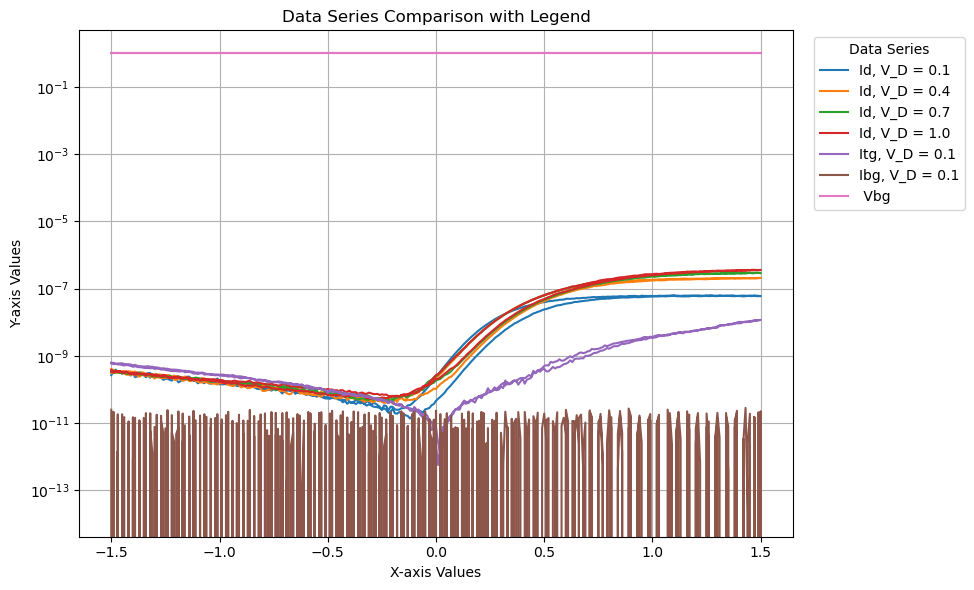

In [15]:
ax = df_new.plot(kind='line', figsize=(10, 6))

# 3. Add labels and title
plt.title('Data Series Comparison with Legend')
plt.xlabel('X-axis Values')
plt.ylabel('Y-axis Values')
plt.yscale('log')

# 4. Customize and display the legend
plt.legend(title='Data Series', loc='upper right', bbox_to_anchor=(1.25, 1)) # Example of placing legend outside
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent labels/legend from overlapping
plt.show()

In [16]:
filtered_df = df_new[df_new['Id, V_D = 0.1'] > 1e-11]
print(filtered_df)

       Id, V_D = 0.1  Id, V_D = 0.4  Id, V_D = 0.7  Id, V_D = 1.0  \
 VTG                                                                
-1.50   3.375900e-10   3.087800e-10   3.279300e-10   3.821100e-10   
-1.49   3.443900e-10   3.088700e-10   3.195800e-10   3.407100e-10   
-1.48   3.513600e-10   3.132600e-10   3.193800e-10   3.439100e-10   
-1.47   3.267600e-10   3.173500e-10   3.226800e-10   3.478500e-10   
-1.46   3.387400e-10   3.142800e-10   3.091400e-10   3.443000e-10   
...              ...            ...            ...            ...   
-1.46   3.177400e-10   3.344300e-10   3.338000e-10   3.492600e-10   
-1.47   3.318200e-10   3.438000e-10   3.373700e-10   3.316000e-10   
-1.48   3.880600e-10   3.538900e-10   3.564100e-10   3.415300e-10   
-1.49   3.296700e-10   3.788900e-10   3.561100e-10   3.196100e-10   
-1.50   2.656300e-10   4.020100e-10   3.594300e-10   3.325100e-10   

       Itg, V_D = 0.1  Ibg, V_D = 0.1   Vbg  
 VTG                                         
-1.50    6

In [75]:
filtered_df = df_new.iloc[140:462]
filtered_df

,"Id, V_D = 0.1","Id, V_D = 0.4","Id, V_D = 0.7","Id, V_D = 1.0","Itg, V_D = 0.1","Ibg, V_D = 0.1",Vbg
VTG,,,,,,,
-0.10,2.423000e-11,5.205000e-11,7.957000e-11,9.223000e-11,3.008000e-11,-3.520000e-12,1
-0.09,2.226000e-11,5.186000e-11,8.159000e-11,9.944000e-11,2.473000e-11,-4.030000e-12,1
-0.08,2.297000e-11,6.239000e-11,9.170000e-11,1.057100e-10,2.501000e-11,1.389000e-11,1
-0.07,2.235000e-11,7.079000e-11,1.012300e-10,1.073600e-10,2.001000e-11,-1.944000e-11,1
-0.06,2.046000e-11,6.785000e-11,9.622000e-11,1.235100e-10,1.375000e-11,1.526000e-11,1
...,...,...,...,...,...,...,...
-0.06,7.967000e-11,1.082500e-10,1.160000e-10,1.078300e-10,1.858000e-11,-9.680000e-12,1
-0.07,6.538000e-11,9.482000e-11,1.028000e-10,1.004000e-10,1.666000e-11,1.000000e-12,1
-0.08,5.761000e-11,8.202000e-11,8.908000e-11,8.634000e-11,2.017000e-11,6.770000e-12,1


In [17]:
Vtg = filtered_df.index.to_numpy()
Id_sample = filtered_df['Id, V_D = 0.4'].to_numpy()


In [24]:
def find_first_Id_above_threshold(data_list, threshold):
    try:
        return next(index for index, value in enumerate(data_list) if value > threshold)
    except StopIteration:
        return -1

In [18]:
sigma = 0.1 # Standard deviation of the Gaussian kernel
smoothed_Id = gaussian_filter1d(Id_sample, sigma)

In [22]:
dIdVg = np.gradient(np.log10(smoothed_Id),Vtg)
smoothed_dIdVg = gaussian_filter1d(dIdVg, 3)

ddIdVg = np.gradient(dIdVg,Vtg)
# Enumerate through the array
for index, value in enumerate(ddIdVg):
    diff = value - ddIdVg[index - 1]
    if abs(value) >= 100:
        dIdVg[index] = 0
        # pass

max_index = np.nanargmax(smoothed_dIdVg)

max_index

np.int64(163)

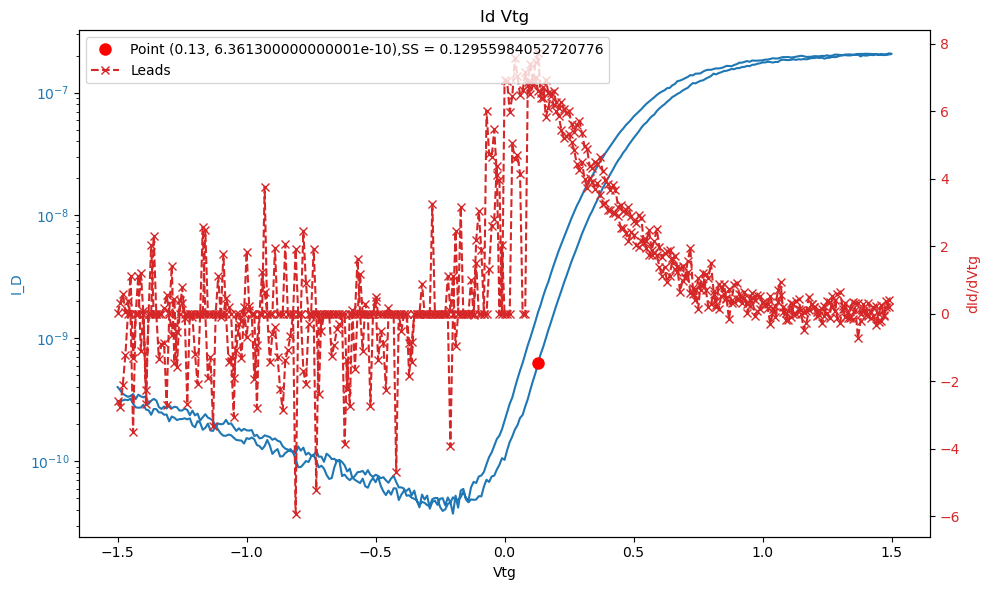

In [23]:




fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first dataset on the primary axis
color = 'tab:blue'
ax1.set_xlabel('Vtg')
ax1.set_ylabel('I_D', color=color)
ax1.plot(Vtg,smoothed_Id)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yscale('log')
ax1.plot(Vtg[max_index], smoothed_Id[max_index], 'o', markersize=8, color='red', label=f'Point ({Vtg[max_index]}, {smoothed_Id[max_index]}),SS = {1/dIdVg[max_index]}')


# Create a second set of axes that shares the same x-axis
ax2 = ax1.twinx()

# Plot the second dataset on the secondary axis
color = 'tab:red'
ax2.set_ylabel('dId/dVtg', color=color)
ax2.plot(Vtg,dIdVg, color=color, marker='x', linestyle='--', label='Leads')
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim(-1e9,1e9)

# Add a title and legend
plt.title('Id Vtg')
fig.tight_layout() # Adjusts plot to ensure everything fits

# To combine the legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()

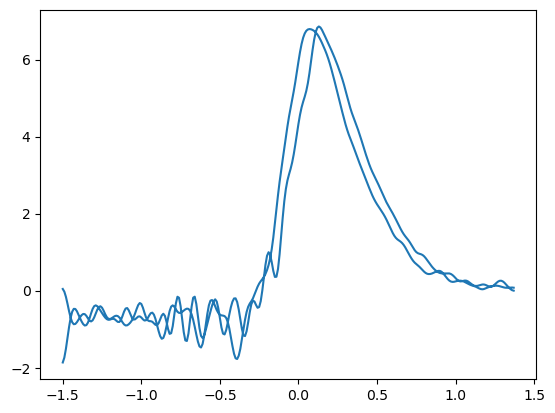

In [21]:
dIdVg = np.gradient(np.log10(smoothed_Id),Vtg)

smoothed_dIdVg = gaussian_filter1d(dIdVg, 3)
ddIdVg = np.gradient(dIdVg,Vtg)
plt.plot(Vtg,smoothed_dIdVg)
#plt.ylim([-10000,10000])
plt.show()

In [26]:
Id_0p1 = filtered_df['Id, V_D = 0.1'].to_numpy()
Id_0p4 = filtered_df['Id, V_D = 0.4'].to_numpy()
Id_0p7 = filtered_df['Id, V_D = 0.7'].to_numpy()
Id_1p0 = filtered_df['Id, V_D = 1.0'].to_numpy()

sigma = 0.1 # Standard deviation of the Gaussian kernel
SS_4 = []
for Id in [Id_0p1,Id_0p4,Id_0p7,Id_1p0]:
    smoothed_Id = gaussian_filter1d(Id, sigma)
    dIdVg = np.gradient(np.log10(smoothed_Id),Vtg)
    max_index = np.nanargmax(dIdVg)
    SS = 1/max(dIdVg)
    Vtg_ss = Vtg[np.nanargmax(dIdVg)]
    SS_4.append(float(SS))

print(SS_4)

[0.06275127154601126, 0.11032857511003005, 0.07711305234909557, 0.10588472902732378]


In [37]:
SS = 1/max(dIdVg)
Vtg_ss = Vtg[np.nanargmax(dIdVg)]

In [ ]:
def SS_out_of_range(SS):
    if SS <= 0.1:
        print("small")
        


In [3]:
# For SS calculation & saving files 


name_list = []
SS_0p1 = []
SS_0p4 = []
SS_0p7 = []
SS_1p0 = []


for file in file_list:
    match = re.search(r'[^\\]+$', file)
    if match:
        result = match.group(0)
    
    print(f'SS: {result} started')
    name_list.append(result)
    try:
        Vbg,df = mo.read_csv_IdVtg_10mV(file)
    except Exception:
        print("File not processed")
        continue
    

    df_reshaped = mo.reshape_table_by_VD(df)
    df_sorted = mo.reorder_by_VG(df_reshaped,Vbg)

    filename =directory_path + '\\sorted\\' + result
    df_sorted.to_csv(filename, index=True)

    df_filtered = fs.filter_noise(df_sorted)
    SS_4,Vtg_ss = fs.find_SS_grad_4(df_filtered)
    print(SS_4)
    SS_0p1.append(SS_4[0])
    SS_0p4.append(SS_4[1])
    SS_0p7.append(SS_4[2])
    SS_1p0.append(SS_4[3])
    

    


SS: R7C5B__ExfoliatedMoS2_TGIdVg_10mV_.csv started
[0.11788284667850893, 0.12955984052720776, 0.14582821613961722, 0.16523617806444962]
SS: R7C5T__ExfoliatedMoS2_TGIdVg_10mV_.csv started
[0.1158928372678362, 0.12424467671536507, 0.12952052279074572, 0.12899694718134588]
SS: R8C5T__ExfoliatedMoS2_TGIdVg_10mV_.csv started
[0.13592368458793513, 0.14497330983618856, 0.13897585573100477, 0.1502175662630195]
SS: SS_per_file_diff_vds.csv started
File not processed
SS: SS_per_file_new_filtering.csv started
File not processed


c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1307: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1308: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1309: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1315: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1307: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1308: RuntimeWarning: divide by z

In [4]:
# For SS calculation & saving files for 15 mV


name_list = []
SS_0p1 = []
SS_0p4 = []
SS_0p7 = []
SS_1p0 = []


for file in file_list:
    match = re.search(r'[^\\]+$', file)
    if match:
        result = match.group(0)
    
    print(f'SS: {result} started')
    name_list.append(result)
    try:
        Vbg,df = mo.read_csv_IdVtg(file)
    except Exception:
        print("File not processed")
        continue
    

    df_reshaped = mo.reshape_table_by_VD(df)
    df_sorted = mo.reorder_by_VG(df_reshaped,Vbg)

    filename =directory_path + '\\sorted\\' + result
    df_sorted.to_csv(filename, index=True)

    df_filtered = fs.filter_noise(df_sorted)
    SS_4,Vtg_ss = fs.find_SS_grad_4(df_filtered)
    print(SS_4)
    SS_0p1.append(SS_4[0])
    SS_0p4.append(SS_4[1])
    SS_0p7.append(SS_4[2])
    SS_1p0.append(SS_4[3])

    


SS: R7C5B__ExfoliatedMoS2_TGIdVg_10mV_.csv started
[0.12743093178943982, 0.6396098128115697, 0.14695736351990166, 0.14402141397542204]
SS: R7C5T__ExfoliatedMoS2_TGIdVg_10mV_.csv started
[0.12303672157733071, 0.8002988971820468, 0.1278184845912734, 0.1296203219288877]
SS: R8C5T__ExfoliatedMoS2_TGIdVg_10mV_.csv started
[0.13614422676970614, 0.7075931012952382, 0.15011564003389033, 0.14622591677263674]
SS: SS_per_file_diff_vds.csv started
File not processed
SS: SS_per_file_new_filtering.csv started
File not processed


In [4]:
SS_df = pd.DataFrame(list(zip(name_list,SS_0p1,SS_0p4,SS_0p7,SS_1p0)), columns=['filename', 'SS, Vds=0.1','SS, Vds=0.4','SS, Vds=0.7','SS, Vds=1.0'])
SS_df.to_csv(f"{directory_path}\\SS_per_file_new_filtering.csv", index=False)